In [23]:
import pandas as pd
data = pd.read_csv('data2012new.csv')
print(data)



            Date    Price     Open     High      Low  index Change %
0      1/13/2012  1639.35  1650.66  1650.75  1626.06   3103   -0.65%
1      1/16/2012  1643.40  1639.68  1647.35  1631.44   3102    0.25%
2      1/17/2012  1651.74  1643.84  1667.87  1641.45   3101    0.51%
3      1/18/2012  1661.25  1652.20  1662.50  1642.74   3100    0.58%
4      1/19/2012  1657.60  1659.70  1670.15  1648.94   3099   -0.22%
...          ...      ...      ...      ...      ...    ...      ...
3083  11/16/2023  1980.85  1959.44  1988.03  1956.49     20    1.11%
3084  11/17/2023  1980.01  1981.21  1993.94  1978.59     19   -0.04%
3085  11/20/2023  1977.19  1980.39  1985.26  1965.20     18   -0.14%
3086  11/21/2023  1998.37  1977.49  2007.52  1977.34     17    1.07%
3087  11/22/2023  1989.72  1998.69  2006.90  1986.89     16   -0.43%

[3088 rows x 7 columns]


In [24]:
dataset=pd.read_csv('data2012new.csv').values
high_value=dataset[:,3]
print(high_value[:5])

high_value=high_value.reshape(-1,1) #convering into a column vector
print(high_value[:5])

print(high_value.shape)

[1650.75 1647.35 1667.87 1662.5 1670.15]
[[1650.75]
 [1647.35]
 [1667.87]
 [1662.5]
 [1670.15]]
(3088, 1)


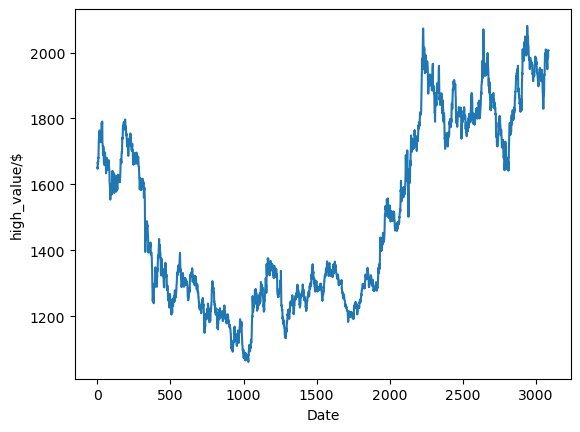

In [25]:
from matplotlib import pyplot as plt

plt.plot(high_value)
plt.xlabel('Date')
plt.ylabel('high_value/$')
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler1=MinMaxScaler(feature_range=(0,1))
scaled_high_value=scaler1.fit_transform(high_value)

print(high_value[:5])
print(scaled_high_value[:5])

[[1650.75]
 [1647.35]
 [1667.87]
 [1662.5]
 [1670.15]]
[[0.57817543]
 [0.57483984]
 [0.59497111]
 [0.58970284]
 [0.59720792]]


In [27]:
data=[]
target=[]

for i in range(50,high_value.shape[0]):
    data.append(scaled_high_value[i-50:i])
    target.append(scaled_high_value[i])
print(data[0])
print(target[0])


[[0.57817543]
 [0.57483984]
 [0.59497111]
 [0.58970284]
 [0.59720792]
 [0.59422551]
 [0.60849987]
 [0.6067634 ]
 [0.63954047]
 [0.65653236]
 [0.66466531]
 [0.66509698]
 [0.67337709]
 [0.67707567]
 [0.68689604]
 [0.68904455]
 [0.66386085]
 [0.67574143]
 [0.67736999]
 [0.67740923]
 [0.66063317]
 [0.65946572]
 [0.65377559]
 [0.66325259]
 [0.65593392]
 [0.66176139]
 [0.66308581]
 [0.6855618 ]
 [0.7067428 ]
 [0.71244273]
 [0.70802798]
 [0.70457466]
 [0.71474821]
 [0.7155723 ]
 [0.6522059 ]
 [0.65022417]
 [0.64293493]
 [0.63532193]
 [0.6151318 ]
 [0.63027931]
 [0.64080604]
 [0.64052153]
 [0.63234933]
 [0.61025596]
 [0.59391157]
 [0.59216529]
 [0.59843423]
 [0.59342104]
 [0.58886894]
 [0.5852979 ]]
[0.59386251]


In [28]:
print(target[0])

[0.59386251]


In [29]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(3038, 50, 1)
(3038, 1)


In [30]:
np.save('data',data)
np.save('target',target)

In [31]:
import joblib
joblib.dump(scaler1, 'stock-scaler.sav') 

['stock-scaler.sav']

In [32]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [33]:
train_data=data[:2700]
train_target=target[:2700]

test_data=data[2700:]
test_target=target[2700:]

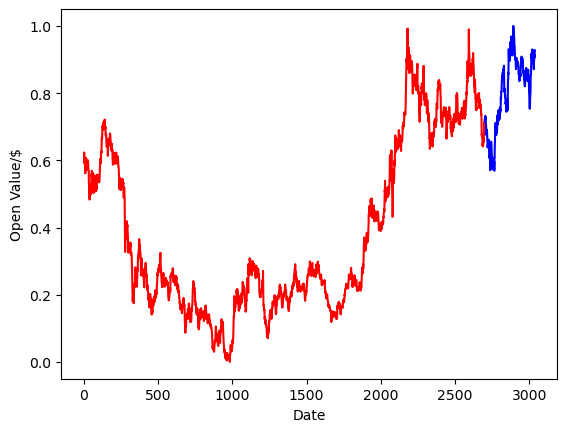

In [34]:
from matplotlib import pyplot as plt

test_x_range=np.arange(2700,3038,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [35]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=128,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=256,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [36]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.1)

Epoch 1/200

76/76 [==============================] - 35s 239ms/step - loss: 0.0084 - val_loss: 0.0020
Epoch 2/200
76/76 [==============================] - 15s 194ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 3/200
76/76 [==============================] - 12s 163ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 4/200
76/76 [==============================] - 13s 167ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 5/200
76/76 [==============================] - 13s 176ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 6/200
76/76 [==============================] - 13s 177ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 7/200
76/76 [==============================] - 12s 161ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/200
76/76 [==============================] - 12s 155ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 9/200
76/76 [==============================] - 12s 155ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 10/200
76/76 [==============================] - 12s 154ms/step - loss: 0.00

Epoch 148/200
76/76 [==============================] - 12s 155ms/step - loss: 4.9856e-04 - val_loss: 2.6778e-04
Epoch 149/200
76/76 [==============================] - 12s 155ms/step - loss: 4.9348e-04 - val_loss: 5.3489e-04
Epoch 150/200
76/76 [==============================] - 12s 155ms/step - loss: 4.9986e-04 - val_loss: 2.4213e-04
Epoch 151/200
76/76 [==============================] - 12s 155ms/step - loss: 5.1539e-04 - val_loss: 2.7912e-04
Epoch 152/200
76/76 [==============================] - 12s 155ms/step - loss: 4.9988e-04 - val_loss: 2.9252e-04
Epoch 153/200
76/76 [==============================] - 12s 155ms/step - loss: 4.8874e-04 - val_loss: 7.4890e-04
Epoch 154/200
76/76 [==============================] - 12s 155ms/step - loss: 5.1794e-04 - val_loss: 2.3637e-04
Epoch 155/200
76/76 [==============================] - 12s 155ms/step - loss: 5.2024e-04 - val_loss: 7.6971e-04
Epoch 156/200
76/76 [==============================] - 12s 155ms/step - loss: 5.5537e-04 - val_loss: 2.3

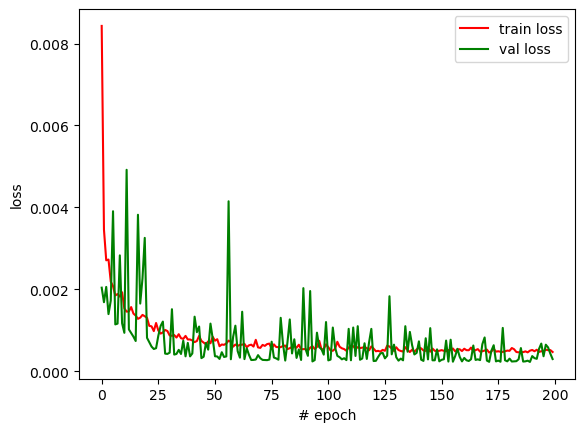

In [37]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

11/11 [==============================] - 5s 126ms/step
r2 score: 0.9796740459150256


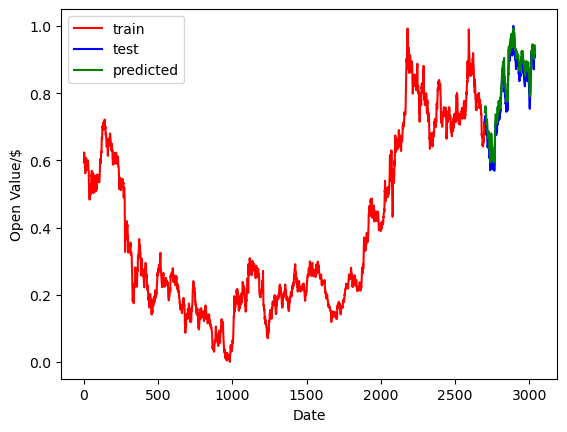

<Figure size 640x480 with 0 Axes>

In [39]:
test_x_range=np.arange(2700,3038,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result+0.02,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()
plt.savefig("myplot.png", dpi = 700)

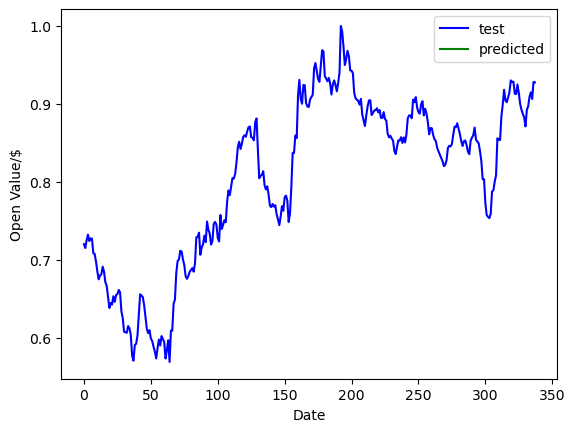

<Figure size 640x480 with 0 Axes>

In [115]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()
plt.savefig('praduicted')
plt.savefig("myplot2.png", dpi = 700)

In [41]:
model.save('LSTM-Stock-Market.model')

INFO:tensorflow:Assets written to: LSTM-Stock-Market.model\assets


INFO:tensorflow:Assets written to: LSTM-Stock-Market.model\assets


In [2]:
from keras.models import load_model

model=load_model('LSTM-Stock-Market.model')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import joblib
scaler=joblib.load('stock-scaler.sav')

In [4]:
import numpy as np

test_data=np.array([
1834.97,
1864.15,
1865.65,
1877.22,
1885.30,
1933.76,
1931.80,
1931.56,
1962.74,
1977.86,
1997.27,
1983.40,
1980.99,
1987.19,
1994.05,
2009.48,
2007.37,
2007.80,
1992.09,
1991.49,
2004.06,
1993.30,
1978.75,
1971.12,
1965.69,
1960.93,
1949.27,
1970.84,
1975.59,
1988.03,
1993.94,
1985.26,
2007.52,
2006.90,
1999.19,
2003.68,
2018.14,
2043.00,
2052.09,
2047.59,
2075.34,
2135.72,
2041.33,
2036.30,
2039.93,
2034.19,
2008.72,
1996.80,
2027.51,
2048.21
]).reshape(-1,1)

print(test_data.shape)



(50, 1)


In [5]:
test_data=scaler.transform(test_data)


In [6]:
test_data=test_data.reshape((1,50,1))
print(test_data.shape)

result=model.predict(test_data)




(1, 50, 1)
1/1 [==============================] - 4s 4s/step


In [7]:
print(result)
print(result.shape)

[[0.96195316]]
(1, 1)


In [8]:
transformed_result=scaler.inverse_transform(result)
print(transformed_result[0][0])

2041.9385
